In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Create data
X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.76


[0.01957363 0.11588155 0.02671949 0.01235642 0.01770372 0.07453437
 0.01405267 0.01413583 0.01892128 0.01074294 0.01628946 0.01645848
 0.018682   0.01699861 0.0176364  0.01301255 0.01570845 0.01371403
 0.01050295 0.01107723 0.0105415  0.02810453 0.01104434 0.01291979
 0.01172246 0.01594598 0.01161194 0.01284583 0.04016023 0.02011063
 0.01166108 0.01283269 0.02629694 0.01630979 0.01528582 0.00800544
 0.01696003 0.01449151 0.0469682  0.01637734 0.01806633 0.01411943
 0.01714387 0.01517432 0.04015419 0.01210507 0.008706   0.01281879
 0.01460335 0.01221054]


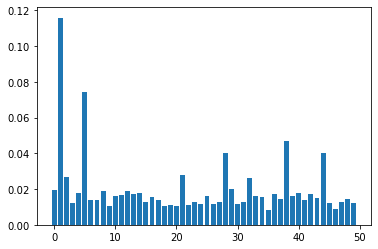

In [4]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [5]:
from sklearn.feature_selection import SelectFromModel

In [6]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False])

In [7]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [8]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.68


The logistic regression model fit to the full dataset is overfitting the training data. That is, the noisy parameters confuse it. 

In [9]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9066666666666666
Testing Score: 0.84


However, fitting to the smaller dataset with the selected features has less noisy parameters to confuse the model. So, we get a more accurate model.